In [1]:
# iris_classification.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report


In [ ]:

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map(dict(enumerate(iris.target_names)))


In [ ]:

X = df.drop('species', axis=1)
y = df['species']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [ ]:

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)

print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:

feature_importances = pd.Series(model.feature_importances_, index=iris.feature_names).sort_values()


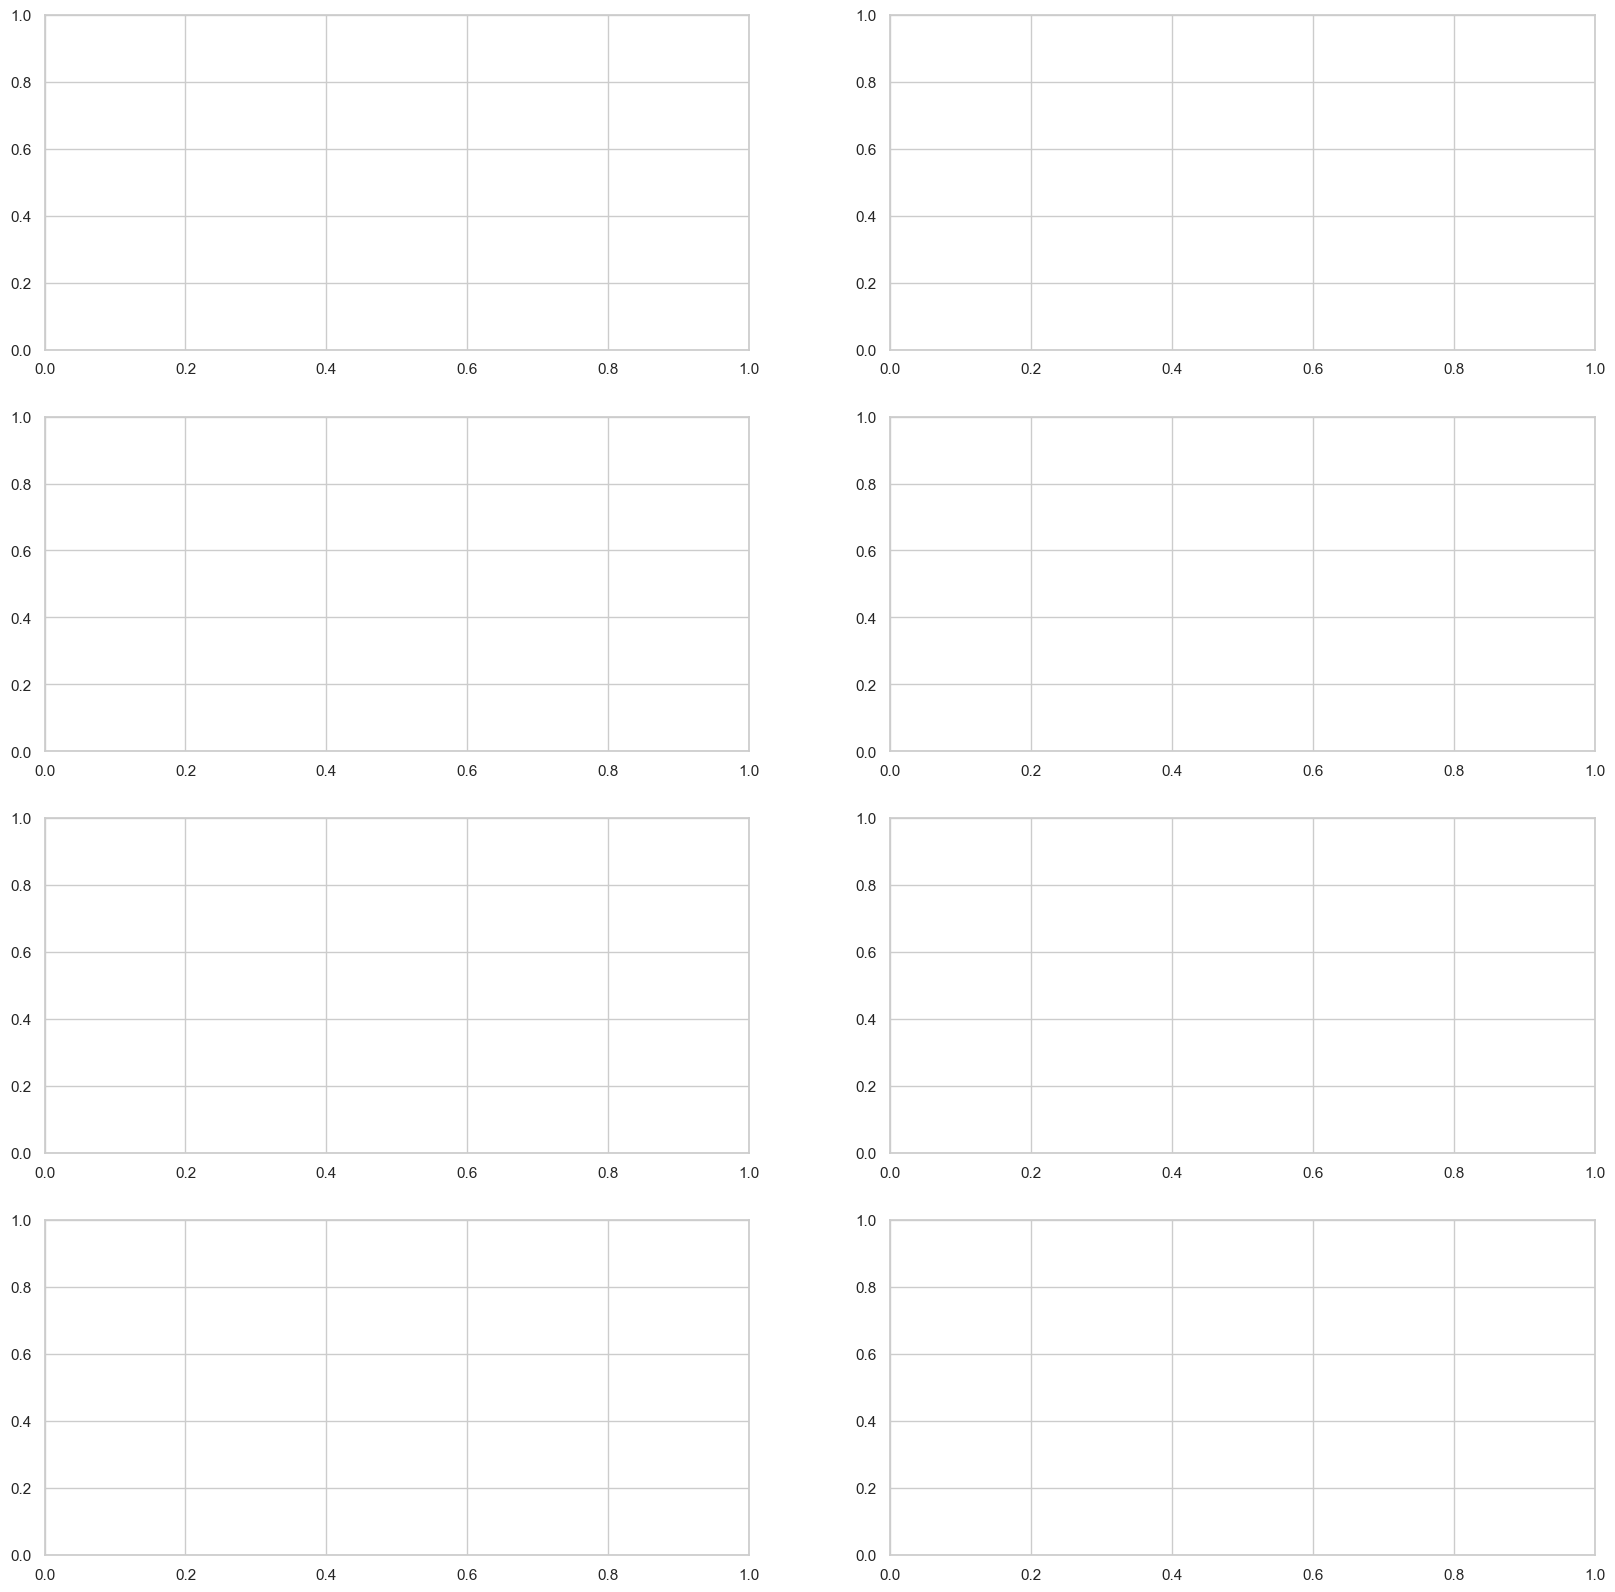

In [ ]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 2, figsize=(20, 20))


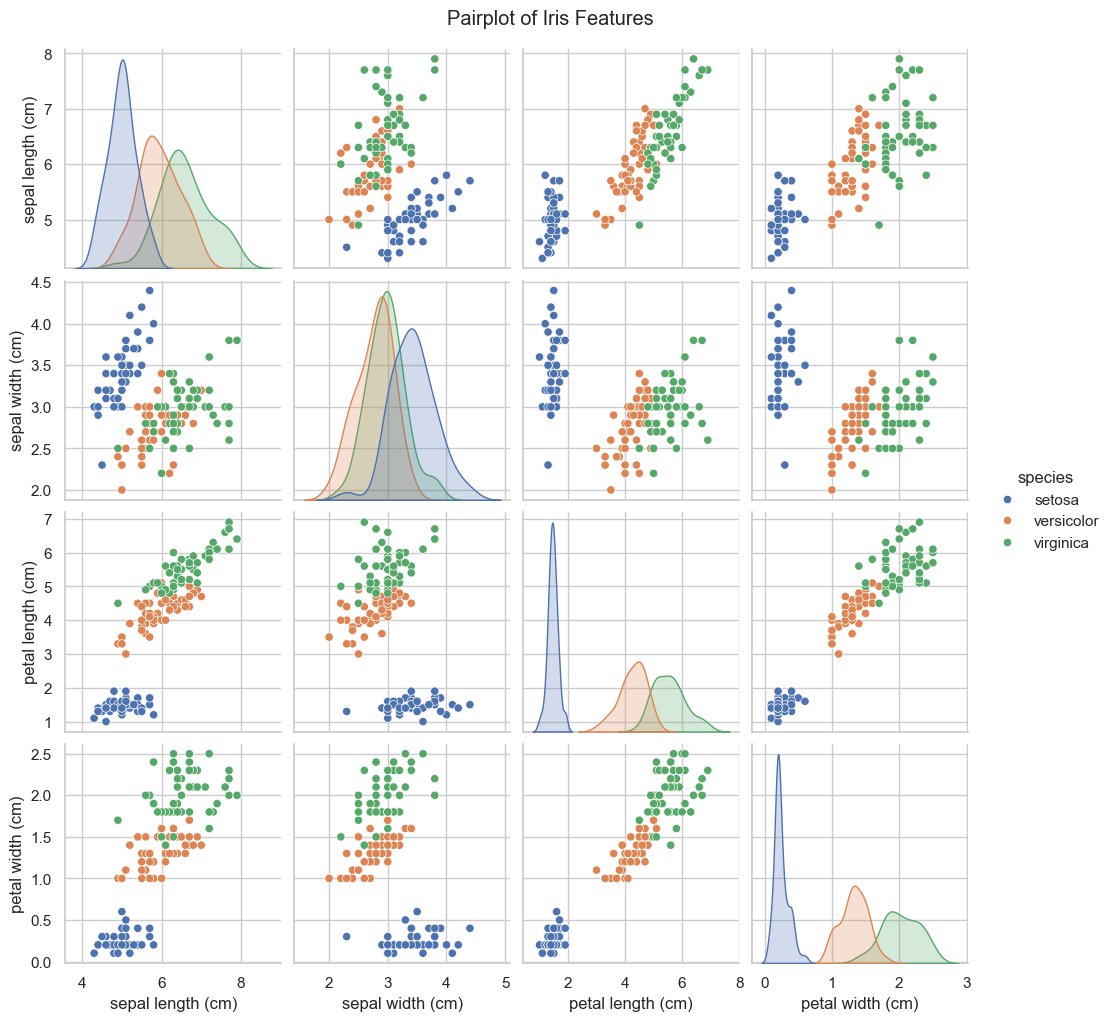

In [ ]:

sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.savefig("pairplot.png")


In [ ]:

sns.heatmap(df.drop(columns="species").corr(), annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("Feature Correlation Heatmap")


Text(0.5, 1.0, 'Feature Correlation Heatmap')

In [ ]:

sns.boxplot(data=df.drop(columns="species"), orient='h', ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Features")


Text(0.5, 1.0, 'Boxplot of Features')

In [ ]:

sns.violinplot(x='species', y='petal length (cm)', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Violin Plot of Petal Length by Species")


Text(0.5, 1.0, 'Violin Plot of Petal Length by Species')

In [ ]:

feature_importances.plot(kind='barh', ax=axes[1, 1])
axes[1, 1].set_title("Feature Importance (Random Forest)")


Text(0.5, 1.0, 'Feature Importance (Random Forest)')

In [ ]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[2, 0])
axes[2, 0].set_title("Confusion Matrix")


Text(0.5, 1.0, 'Confusion Matrix')

In [ ]:

sns.histplot(df['petal length (cm)'], kde=True, bins=20, ax=axes[2, 1])
axes[2, 1].set_title("Distribution of Petal Length")


Text(0.5, 1.0, 'Distribution of Petal Length')

In [ ]:

sns.swarmplot(x='species', y='sepal width (cm)', data=df, ax=axes[3, 0])
axes[3, 0].set_title("Swarm Plot of Sepal Width by Species")


Text(0.5, 1.0, 'Swarm Plot of Sepal Width by Species')

In [ ]:

axes[3, 1].axis('off')


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

In [ ]:

plt.tight_layout()
plt.savefig("iris_analysis_plots.png")
plt.show()


<Figure size 640x480 with 0 Axes>